In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [2]:
# EDA 분석

In [3]:
train=pd.read_csv("C:/Users/limok/JangbogoProject/train.csv")
train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/limok/JangbogoProject/train.csv'

In [4]:
train["date_2"]=pd.to_datetime(train["date"])

In [5]:
train.info()  # 데이터 타임 형식으로 변환  # nan값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1733 non-null   object        
 1   요일              1733 non-null   object        
 2   배추_거래량(kg)      1733 non-null   float64       
 3   배추_가격(원/kg)     1733 non-null   float64       
 4   무_거래량(kg)       1733 non-null   float64       
 5   무_가격(원/kg)      1733 non-null   float64       
 6   양파_거래량(kg)      1733 non-null   float64       
 7   양파_가격(원/kg)     1733 non-null   float64       
 8   건고추_거래량(kg)     1733 non-null   float64       
 9   건고추_가격(원/kg)    1733 non-null   float64       
 10  마늘_거래량(kg)      1733 non-null   float64       
 11  마늘_가격(원/kg)     1733 non-null   float64       
 12  대파_거래량(kg)      1733 non-null   float64       
 13  대파_가격(원/kg)     1733 non-null   float64       
 14  얼갈이배추_거래량(kg)   1733 non-null   float64       
 15  얼갈이배

In [6]:
# 연, 월 데이터 추가
train["date_년"]=train["date_2"].dt.strftime("%Y")
train["date_월"]=train["date_2"].dt.strftime("%m")

In [7]:
train.info() # 연, 월 데이터 추가


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1733 non-null   object        
 1   요일              1733 non-null   object        
 2   배추_거래량(kg)      1733 non-null   float64       
 3   배추_가격(원/kg)     1733 non-null   float64       
 4   무_거래량(kg)       1733 non-null   float64       
 5   무_가격(원/kg)      1733 non-null   float64       
 6   양파_거래량(kg)      1733 non-null   float64       
 7   양파_가격(원/kg)     1733 non-null   float64       
 8   건고추_거래량(kg)     1733 non-null   float64       
 9   건고추_가격(원/kg)    1733 non-null   float64       
 10  마늘_거래량(kg)      1733 non-null   float64       
 11  마늘_가격(원/kg)     1733 non-null   float64       
 12  대파_거래량(kg)      1733 non-null   float64       
 13  대파_가격(원/kg)     1733 non-null   float64       
 14  얼갈이배추_거래량(kg)   1733 non-null   float64       
 15  얼갈이배

In [8]:
# 년월 데이터 추가
train["date_년월"]=train['date_년']+train['date_월'].astype(str)

In [9]:
train["date_월"]=train["date_월"].astype(int)

In [ ]:
# 기술통계

In [12]:
train.describe()

배추_거래량(kg)  배추_가격(원/kg)     무_거래량(kg)   무_가격(원/kg)    양파_거래량(kg)  \
count  1.733000e+03  1733.000000  1.733000e+03  1733.000000  1.733000e+03   
mean   1.113022e+06   597.120600  1.274344e+06   490.738604  1.656628e+06   
std    8.376334e+05   410.151434  7.065624e+05   299.193862  9.506928e+05   
min    0.000000e+00     0.000000  0.000000e+00     0.000000  0.000000e+00   
25%    6.892023e+05   335.000000  1.008677e+06   324.000000  1.334250e+06   
50%    1.061471e+06   577.000000  1.374790e+06   453.000000  1.703356e+06   
75%    1.385737e+06   805.000000  1.661663e+06   717.000000  2.143338e+06   
max    5.210215e+06  5000.000000  3.859746e+06  1360.000000  5.024753e+06   

       양파_가격(원/kg)    건고추_거래량(kg)   건고추_가격(원/kg)    마늘_거래량(kg)  마늘_가격(원/kg)  \
count  1733.000000    1733.000000    1733.000000  1.733000e+03  1733.000000   
mean    652.812464    3578.541546    9537.642239  1.383455e+05  3433.506636   
std     366.613456   24139.188640    8757.181661  1.431412e+05  1751.773991   
min       0.000000       0.000000       0.000000  0.000000e+00     0.000000   
25%     467.000000     129.100000    6015.000000  7.392050e+04  2687.000000   
50%     638.000000     544.200000    8607.000000  1.040097e+05  3953.000000   
75%     925.000000    1753.000000   12500.000000  1.533750e+05  4758.000000   
max    2000.000000  413656.000000  170836.000000  1.092180e+06  6415.000000   

       ...  청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)    애호박_거래량(kg)  \
count  ...   1733.000000  1.733000e+03    1733.000000    1733.000000   
mean   ...   2740.142527  4.234344e+05    1576.184074  302488.655857   
std    ...   2428.808396  3.704087e+05     931.561341  172693.828603   
min    ...      0.000000  0.000000e+00       0.000000       0.000000   
25%    ...   1471.000000  1.871330e+05    1061.000000  224225.700000   
50%    ...   2062.000000  3.218295e+05    1600.000000  320756.000000   
75%    ...   3561.000000  5.951962e+05    2225.000000  409689.000000   
max    ...  18070.000000  2.202192e+06    5294.000000  831849.000000   

       애호박_가격(원/kg)  캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  \
count   1733.000000  1.733000e+03    1733.000000    1733.000000   
mean    1590.833814  1.183558e+05    3214.508944    6690.233756   
std     1034.877455  2.465254e+05    2150.772383   24296.175358   
min        0.000000  0.000000e+00       0.000000       0.000000   
25%      983.000000  9.742000e+02    2053.000000       0.000000   
50%     1474.000000  4.541600e+03    3318.000000     126.000000   
75%     2197.000000  7.459400e+04    4302.000000    2782.000000   
max     6778.000000  1.490337e+06   25000.000000  382263.400000   

       샤인마스캇_가격(원/kg)       date_월  
count     1733.000000  1733.000000  
mean      6989.684939     6.280439  
std       7921.093712     3.373900  
min          0.000000     1.000000  
25%          0.000000     3.000000  
50%       6863.000000     6.000000  
75%      12121.000000     9.000000  
max      40000.000000    12.000000  

[8 rows x 43 columns]

In [13]:
# 년, 월, 년월로 거래량과 가격 분리
a_list=train.columns
tra_list=a_list[a_list.str.contains("거래량")],"date_월"
tra_list
pri_list=a_list[a_list.str.contains("가격")]
pri_list

Index(['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [14]:
pri_month_list=pd.concat([train[pri_list],train["date_월"],train["date_년"],train["date_년월"]],axis=1)
pri_month_list.head(2)

배추_가격(원/kg)  무_가격(원/kg)  양파_가격(원/kg)  건고추_가격(원/kg)  마늘_가격(원/kg)  \
0          0.0         0.0          0.0           0.0          0.0   
1        329.0       360.0       1281.0       11000.0       5475.0   

   대파_가격(원/kg)  얼갈이배추_가격(원/kg)  양배추_가격(원/kg)  깻잎_가격(원/kg)  시금치_가격(원/kg)  ...  \
0          0.0             0.0           0.0          0.0           0.0  ...   
1       1704.0          1331.0         348.0      13242.0        2339.0  ...   

   토마토_가격(원/kg)  청상추_가격(원/kg)  백다다기_가격(원/kg)  애호박_가격(원/kg)  캠벨얼리_가격(원/kg)  \
0           0.0           0.0            0.0           0.0            0.0   
1        1621.0        9235.0         2109.0        2414.0         2014.0   

   샤인마스캇_가격(원/kg)  date_월  date_년  date_계절  date_년월  
0             0.0       1    2016       겨울   201601  
1             0.0       1    2016       겨울   201601  

[2 rows x 25 columns]

In [15]:
tra_month_list=pd.concat([train[tra_list[0]],train["date_월"],train["date_년"],train["date_년월"]],axis=1)
tra_month_list.head(2)

배추_거래량(kg)  무_거래량(kg)  양파_거래량(kg)  건고추_거래량(kg)  마늘_거래량(kg)  대파_거래량(kg)  \
0         0.0        0.0         0.0          0.0         0.0         0.0   
1     80860.0    80272.0    122787.5          3.0     15019.0     92334.0   

   얼갈이배추_거래량(kg)  양배추_거래량(kg)  깻잎_거래량(kg)  시금치_거래량(kg)  ...  토마토_거래량(kg)  \
0            0.0          0.0         0.0          0.0  ...          0.0   
1         6359.0      40028.0      4374.9      16550.5  ...      30950.0   

   청상추_거래량(kg)  백다다기_거래량(kg)  애호박_거래량(kg)  캠벨얼리_거래량(kg)  샤인마스캇_거래량(kg)  \
0          0.0           0.0          0.0           0.0            0.0   
1       5125.0         434.0      19159.0         880.0            0.0   

   date_월  date_년  date_계절  date_년월  
0       1    2016       겨울   201601  
1       1    2016       겨울   201601  

[2 rows x 25 columns]

In [16]:
tra_mon_year=tra_month_list.groupby(["date_년","date_월","date_년월"]).mean().reset_index()
tra_mon_year.head(2) 

date_년  date_월 date_년월     배추_거래량(kg)     무_거래량(kg)    양파_거래량(kg)  \
0   2016       1  201601  654757.393548  1.081629e+06  1.168312e+06   
1   2016       2  201602  742990.393103  1.286839e+06  1.320197e+06   

   건고추_거래량(kg)     마늘_거래량(kg)     대파_거래량(kg)  얼갈이배추_거래량(kg)  ...  \
0  1254.290323  107073.141935  527277.087097  127058.774194  ...   
1  1629.403448  112411.427586  563178.731034  154126.200000  ...   

      당근_거래량(kg)  파프리카_거래량(kg)    새송이_거래량(kg)   팽이버섯_거래량(kg)    토마토_거래량(kg)  \
0  255418.316129  49294.483871  142217.129032  108376.087097  122185.193548   
1  274772.806897  75193.779310  134875.255172  109759.068966  178502.693103   

    청상추_거래량(kg)   백다다기_거래량(kg)    애호박_거래량(kg)  캠벨얼리_거래량(kg)  샤인마스캇_거래량(kg)  
0  21233.909677  139324.419355  179996.283871   1875.464516            0.0  
1  24395.275862  181465.289655  188010.703448   1387.510345            0.0  

[2 rows x 24 columns]

In [19]:
pri_mon_year=pri_month_list.groupby(["date_년","date_월","date_년월"]).mean().reset_index()
pri_mon_year.head(2)

date_년  date_월 date_년월  배추_가격(원/kg)  무_가격(원/kg)  양파_가격(원/kg)  건고추_가격(원/kg)  \
0   2016       1  201601   445.903226  384.032258  1009.774194   5382.870968   
1   2016       2  201602   727.137931  385.172414  1065.586207   5353.241379   

   마늘_가격(원/kg)  대파_가격(원/kg)  얼갈이배추_가격(원/kg)  ...  당근_가격(원/kg)  파프리카_가격(원/kg)  \
0  4010.064516  1498.870968     1009.935484  ...   667.741935    6135.419355   
1  4283.379310  1845.620690      953.206897  ...   649.310345    4111.241379   

   새송이_가격(원/kg)  팽이버섯_가격(원/kg)  토마토_가격(원/kg)  청상추_가격(원/kg)  백다다기_가격(원/kg)  \
0   2190.225806    1198.161290   1938.419355   3594.354839    2045.935484   
1   2275.275862    1280.241379   2257.068966   2533.517241    2095.275862   

   애호박_가격(원/kg)  캠벨얼리_가격(원/kg)  샤인마스캇_가격(원/kg)  
0    2485.00000    2343.967742             0.0  
1    2617.62069    2990.241379             0.0  

[2 rows x 24 columns]

In [22]:
apc=pri_month_list.groupby(["date_년","date_월","date_년월"]).mean()
apc.columns

Index(['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [23]:
pri_month_list.columns

Index(['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)', 'date_월', 'date_년', 'date_계절', 'date_년월'],
      dtype='object')

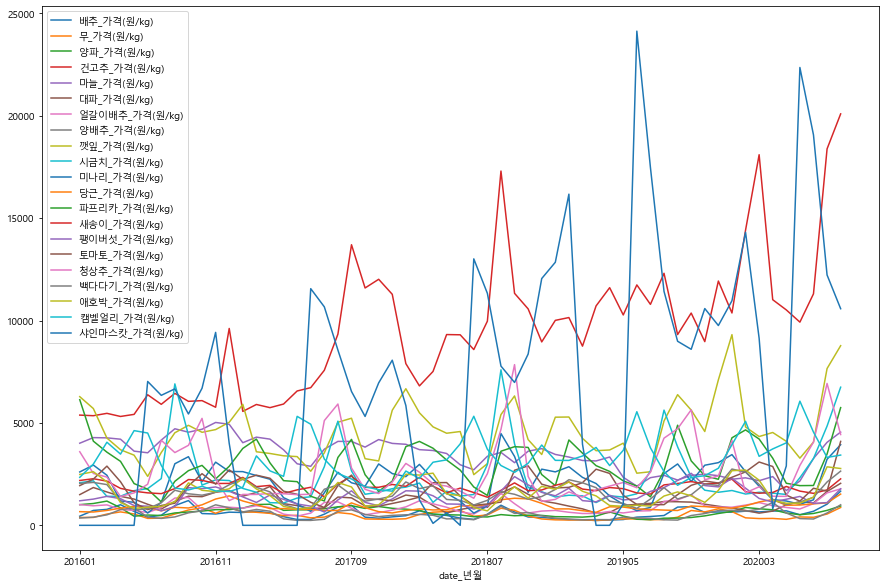

In [24]:
# 년월 데이터 전체 가격 꺽은선 그래프
pri_mon_year.plot(x="date_년월", y=['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)'] ,figsize=(15,10))

plt.show()

In [ ]:
# 상관분석

In [140]:
train_cor=train.corr() 
train_cor.head(2)

배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  \
배추_거래량(kg)     1.000000     0.252138   0.831835    0.417871    0.453282   
배추_가격(원/kg)    0.252138     1.000000   0.369021    0.701881    0.283631   

             양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  \
배추_거래량(kg)      0.378302     0.160840      0.218057    0.204959     0.558073   
배추_가격(원/kg)     0.566080     0.007998      0.334916    0.060414     0.570541   

             ...  청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  \
배추_거래량(kg)   ...      0.228033      0.182778       0.355701     0.521207   
배추_가격(원/kg)  ...      0.535008      0.115396       0.537879     0.329952   

             애호박_가격(원/kg)  캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  \
배추_거래량(kg)       0.281118      0.225324       0.222596       0.151728   
배추_가격(원/kg)      0.559692      0.509896       0.246548       0.395184   

             샤인마스캇_가격(원/kg)    date_월  
배추_거래량(kg)         0.311766  0.436273  
배추_가격(원/kg)        0.201157  0.104900  

[2 rows x 43 columns]

In [28]:
pri_month_list_corr=pri_month_list.corr()

In [29]:
tra_month_list_corr=tra_month_list.corr()

In [ ]:
# 전체 히트맵 데이터

Text(0.5, 1.0, '채소 가격 HeatMap')

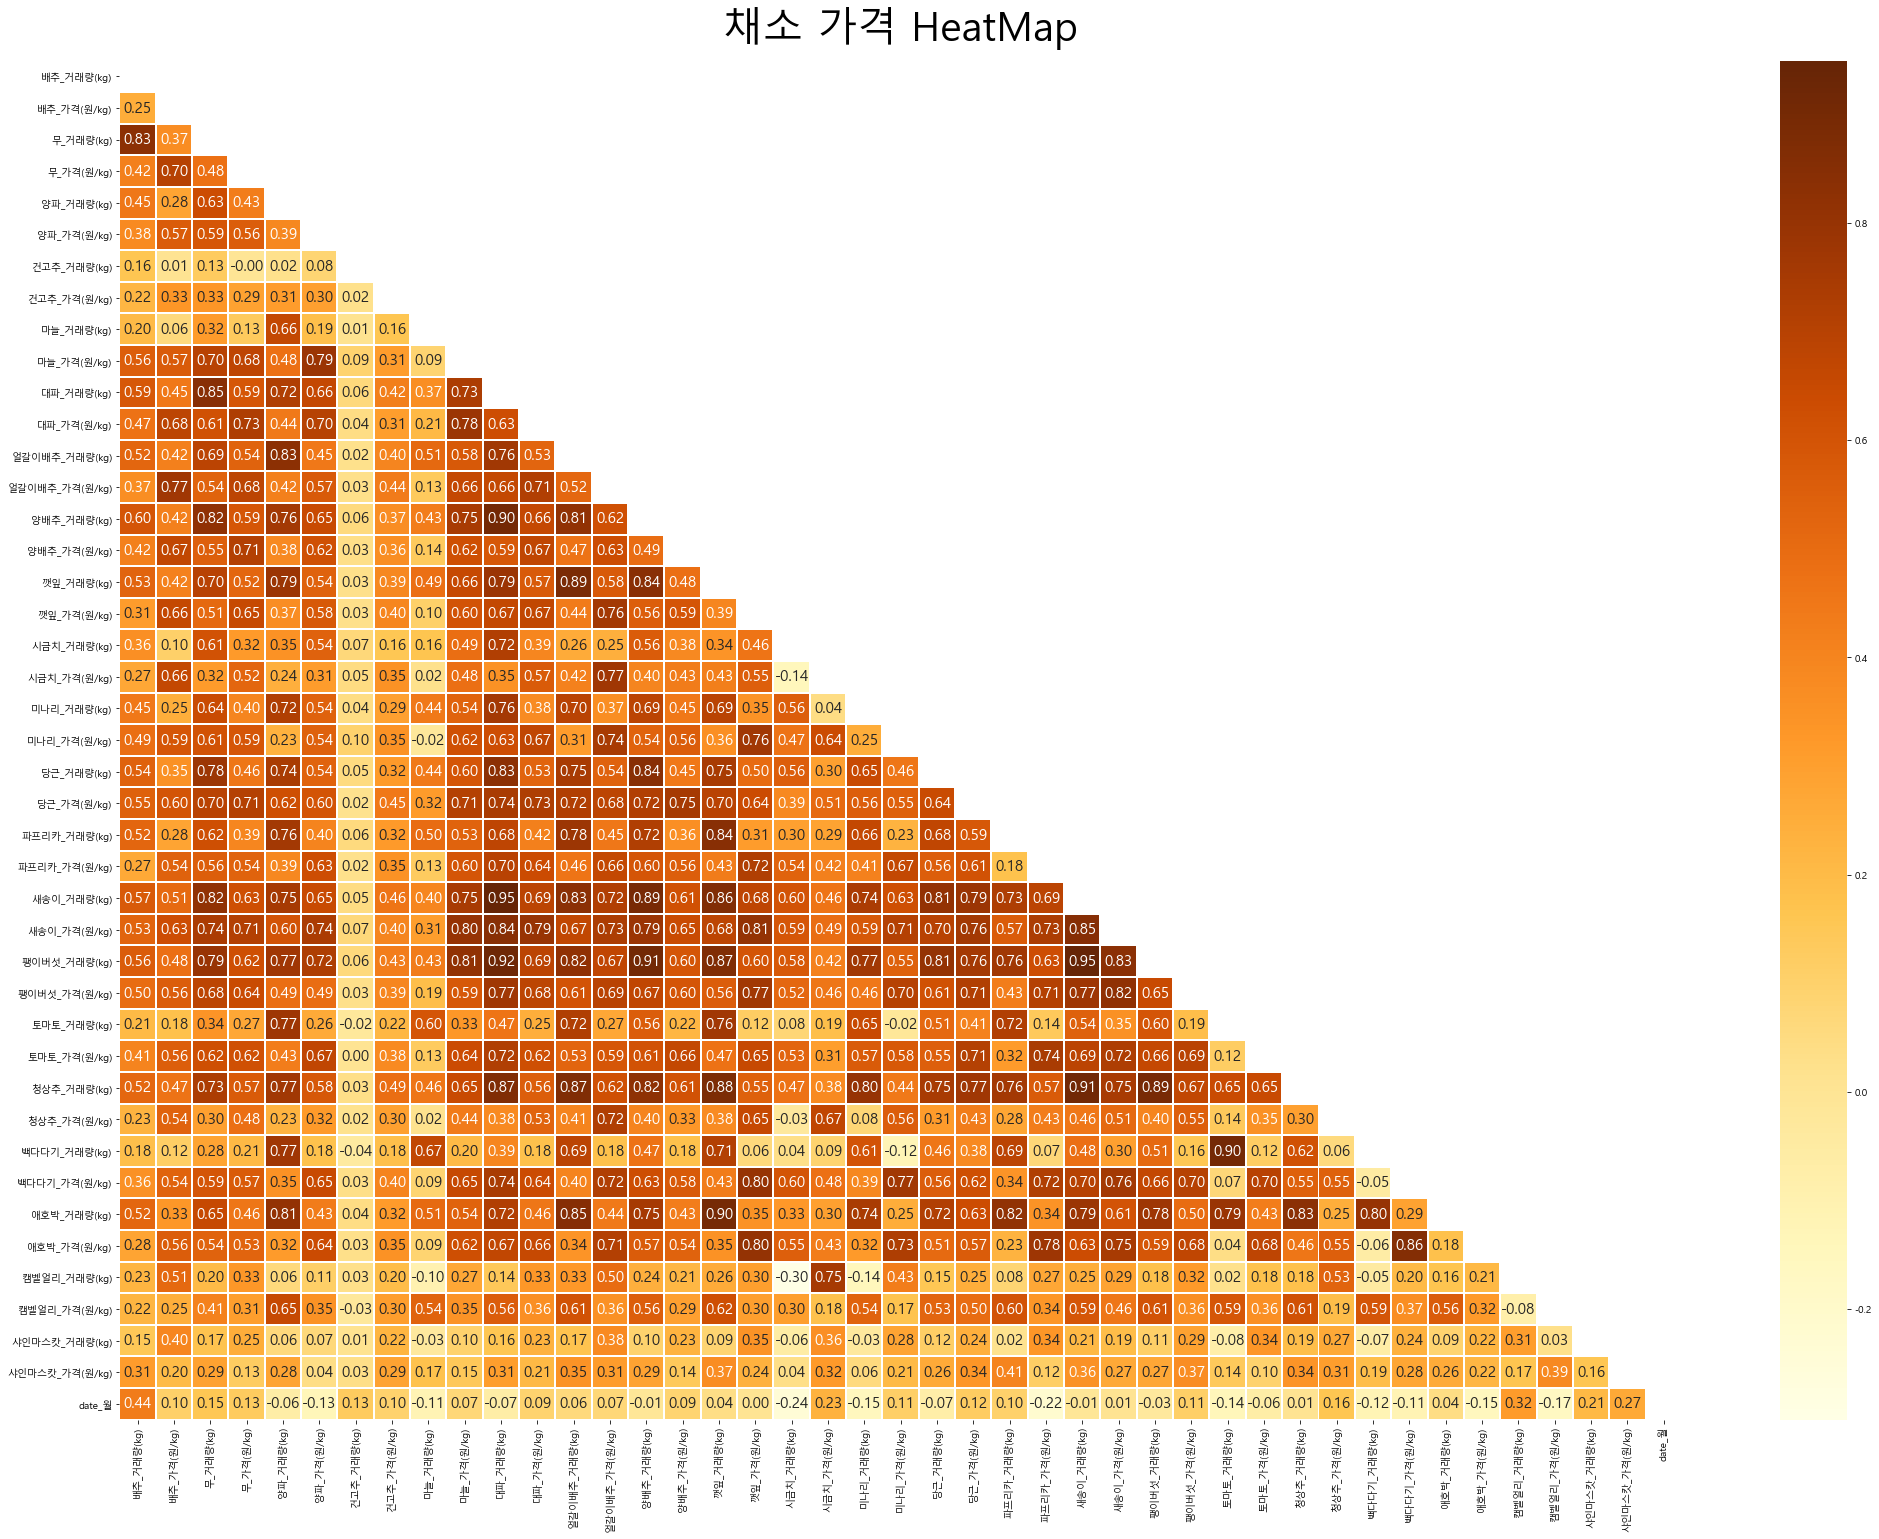

In [30]:
plt.figure(figsize=(35,25))


mask_s = np.triu(np.ones_like(train_cor, dtype = bool))

sns.heatmap(train_cor, annot=True, fmt=".2f", linewidths=1, mask=mask_s, cmap='YlOrBr', annot_kws={"size": 15}) # 모든 변수간의 관계가 모두 나옴. 그러나 아래 위로 대칭이기 때문에 모두 나올 필요없음.
plt.title('채소 가격 HeatMap', fontsize =40, pad = 20)

In [ ]:
# 채소 가격 히트맵

Text(0.5, 1.0, '채소 가격 HeatMap')

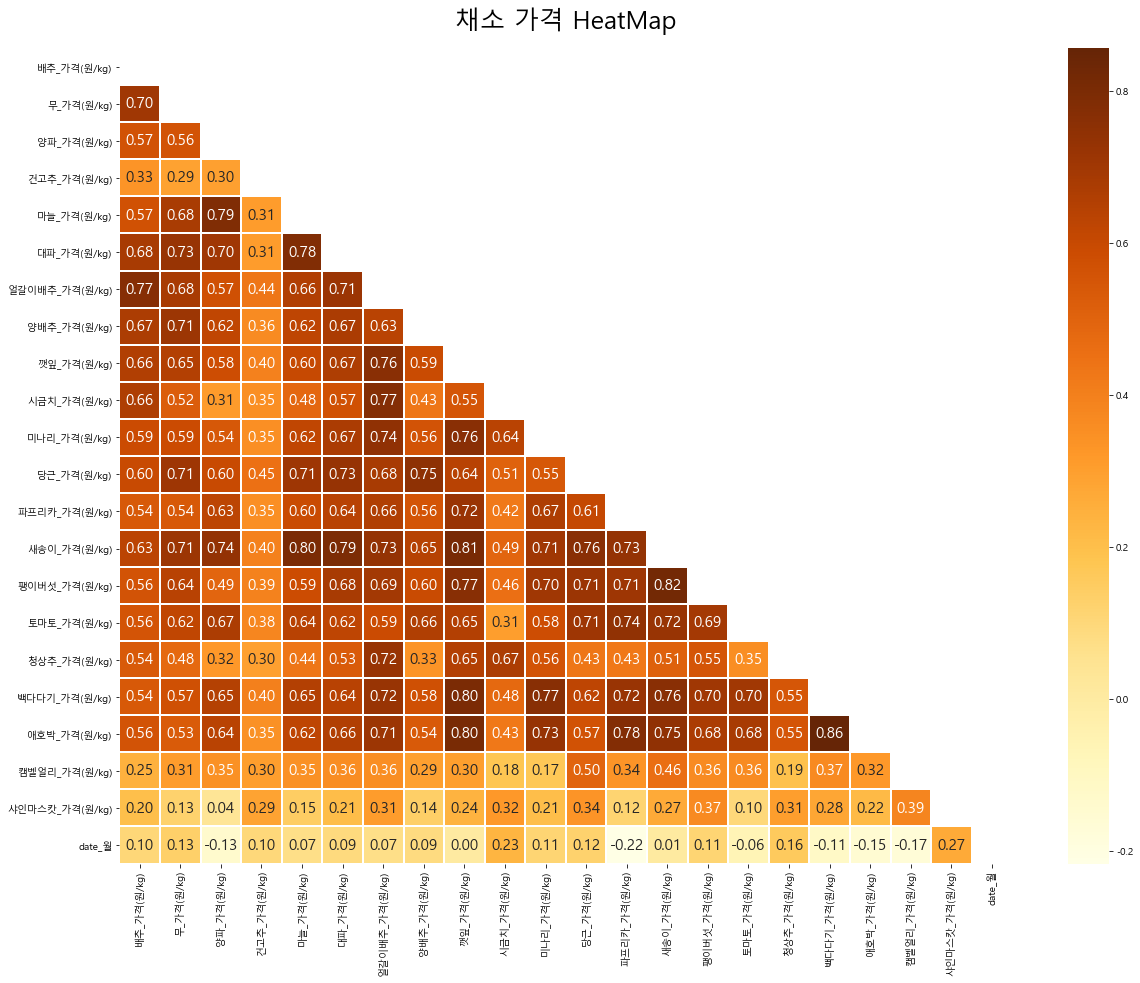

In [31]:
plt.figure(figsize=(20,15))


mask_s = np.triu(np.ones_like(pri_month_list_corr, dtype = bool))

sns.heatmap(pri_month_list_corr, annot=True, fmt=".2f", linewidths=1, mask=mask_s, cmap='YlOrBr', annot_kws={"size": 15}) # 모든 변수간의 관계가 모두 나옴. 그러나 아래 위로 대칭이기 때문에 모두 나올 필요없음.
plt.title('채소 가격 HeatMap', fontsize =25, pad = 20)

In [ ]:
# 채소 거래량 히트맵

Text(0.5, 1.0, '채소 가격 HeatMap')

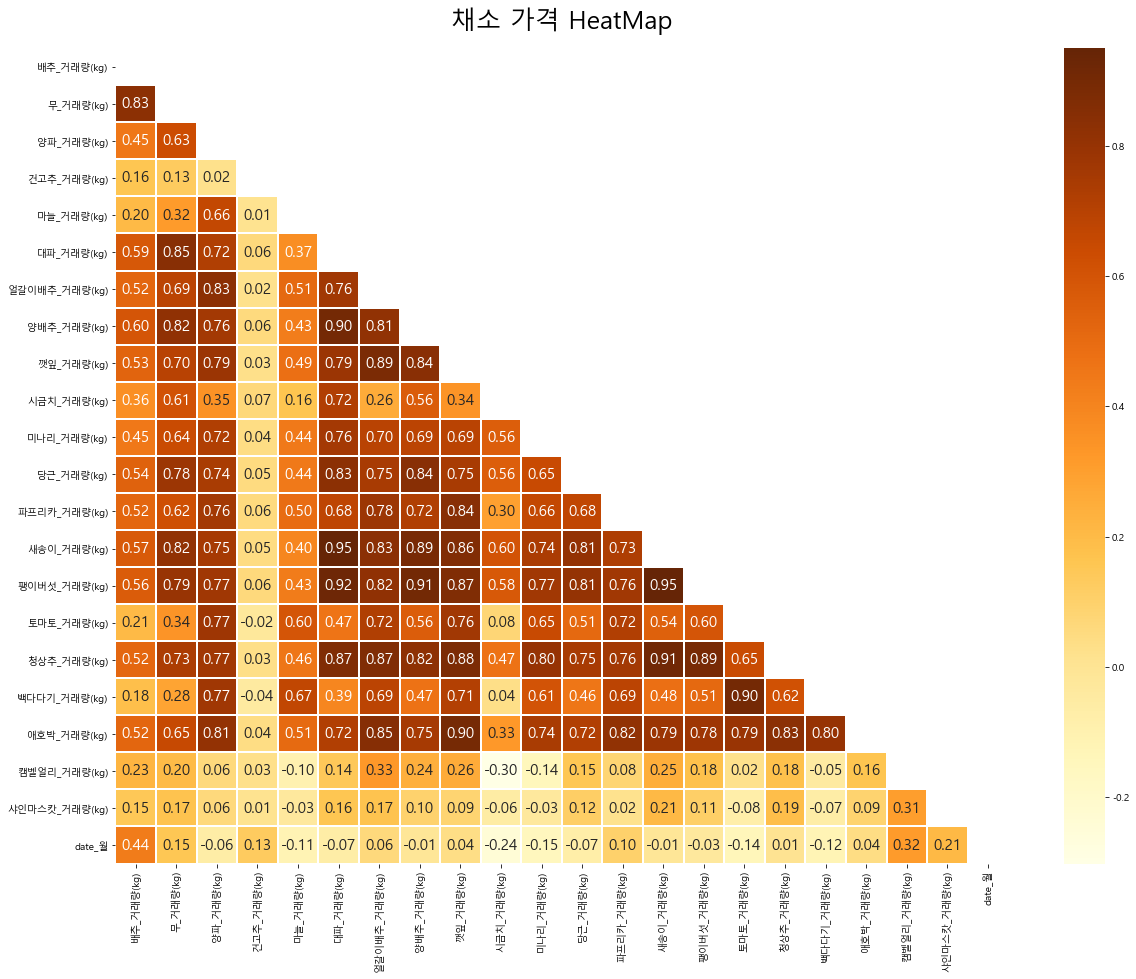

In [32]:
plt.figure(figsize=(20,15))


mask_s = np.triu(np.ones_like(tra_month_list_corr, dtype = bool))

sns.heatmap(tra_month_list_corr, annot=True, fmt=".2f", linewidths=1, mask=mask_s, cmap='YlOrBr', annot_kws={"size": 15}) # 모든 변수간의 관계가 모두 나옴. 그러나 아래 위로 대칭이기 때문에 모두 나올 필요없음.
plt.title('채소 거래량 HeatMap', fontsize =25, pad = 20)

In [33]:
# 박스플랏


In [34]:
tra_mon_year.columns

Index(['date_년', 'date_월', 'date_년월', '배추_거래량(kg)', '무_거래량(kg)', '양파_거래량(kg)',
       '건고추_거래량(kg)', '마늘_거래량(kg)', '대파_거래량(kg)', '얼갈이배추_거래량(kg)',
       '양배추_거래량(kg)', '깻잎_거래량(kg)', '시금치_거래량(kg)', '미나리_거래량(kg)', '당근_거래량(kg)',
       '파프리카_거래량(kg)', '새송이_거래량(kg)', '팽이버섯_거래량(kg)', '토마토_거래량(kg)',
       '청상추_거래량(kg)', '백다다기_거래량(kg)', '애호박_거래량(kg)', '캠벨얼리_거래량(kg)',
       '샤인마스캇_거래량(kg)'],
      dtype='object')

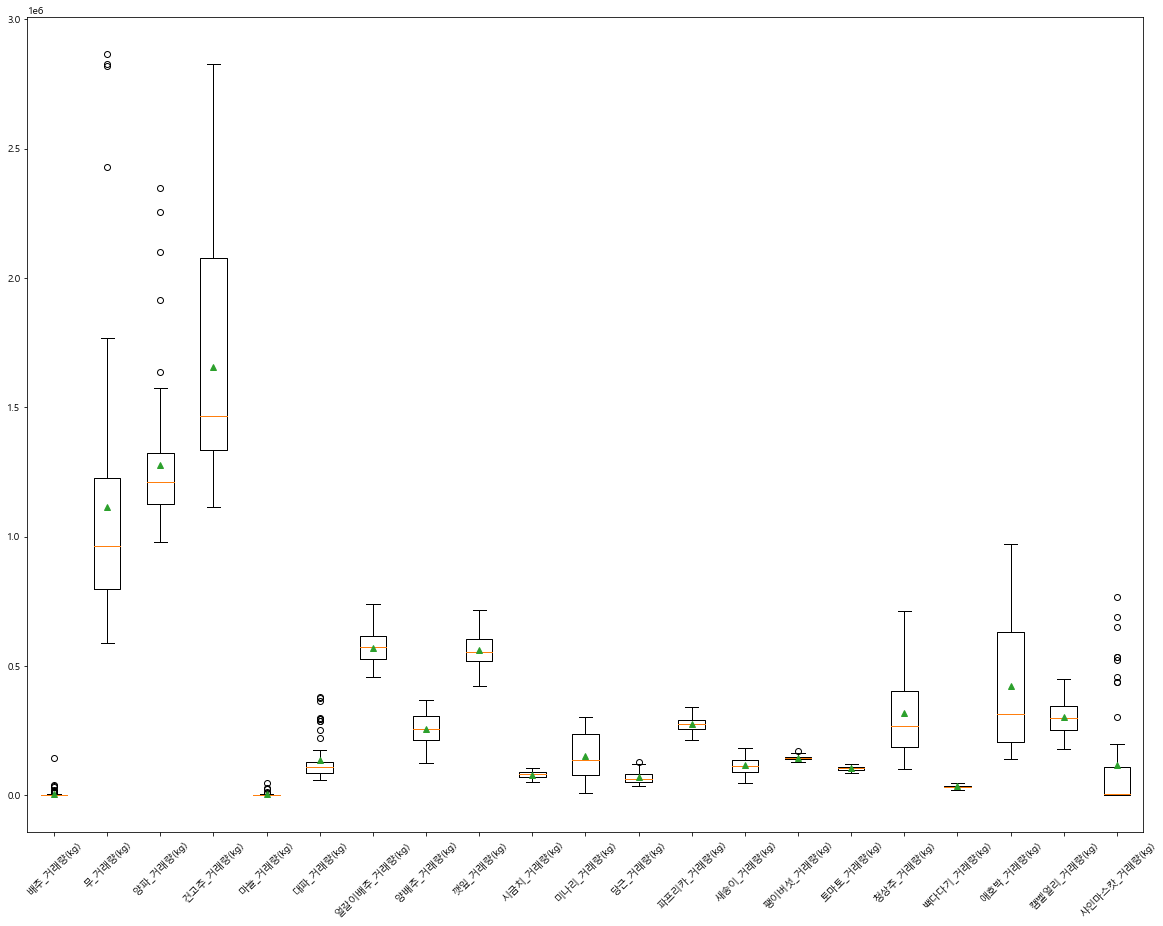

In [35]:
plt.figure(figsize=(20,15))
plt.boxplot([tra_mon_year.iloc[:,23],tra_mon_year.iloc[:,3],tra_mon_year.iloc[:,4],tra_mon_year.iloc[:,5],tra_mon_year.iloc[:,6],
            tra_mon_year.iloc[:,7],tra_mon_year.iloc[:,8],tra_mon_year.iloc[:,9],tra_mon_year.iloc[:,10],tra_mon_year.iloc[:,11],
            tra_mon_year.iloc[:,12],tra_mon_year.iloc[:,13],tra_mon_year.iloc[:,14],tra_mon_year.iloc[:,15],tra_mon_year.iloc[:,16],
            tra_mon_year.iloc[:,17],tra_mon_year.iloc[:,18],tra_mon_year.iloc[:,19],tra_mon_year.iloc[:,20],tra_mon_year.iloc[:,21],
            tra_mon_year.iloc[:,22]],labels=[ '샤인마스캇_거래량(kg)','배추_거래량(kg)', '무_거래량(kg)', '양파_거래량(kg)',
       '건고추_거래량(kg)', '마늘_거래량(kg)', '대파_거래량(kg)', '얼갈이배추_거래량(kg)',
       '양배추_거래량(kg)', '깻잎_거래량(kg)', '시금치_거래량(kg)', '미나리_거래량(kg)', '당근_거래량(kg)',
       '파프리카_거래량(kg)', '새송이_거래량(kg)', '팽이버섯_거래량(kg)', '토마토_거래량(kg)',
       '청상추_거래량(kg)', '백다다기_거래량(kg)', '애호박_거래량(kg)', '캠벨얼리_거래량(kg)'], showmeans=True)
plt.xticks(rotation=45)
plt.show()

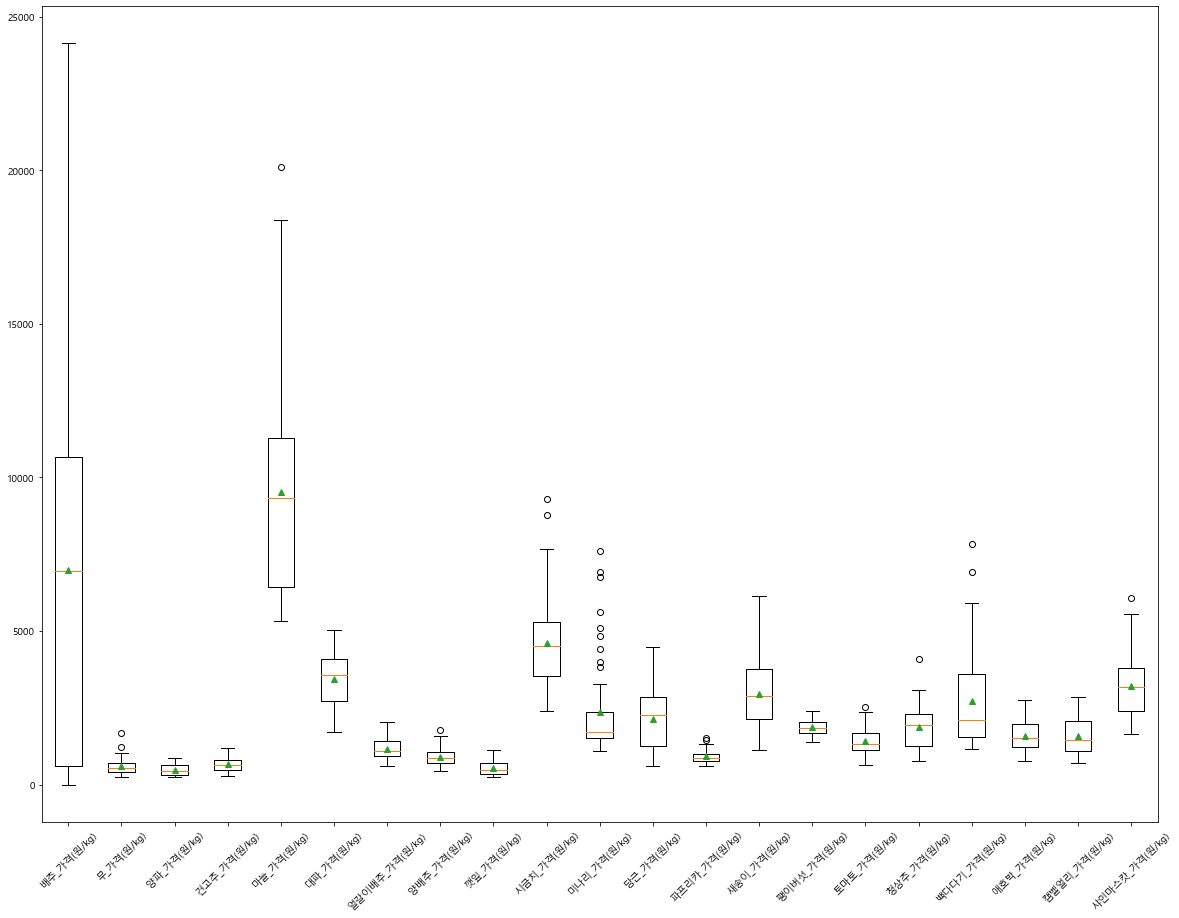

In [36]:
plt.figure(figsize=(20,15))
plt.boxplot([pri_mon_year.iloc[:,23],pri_mon_year.iloc[:,3],pri_mon_year.iloc[:,4],pri_mon_year.iloc[:,5],pri_mon_year.iloc[:,6],
            pri_mon_year.iloc[:,7],pri_mon_year.iloc[:,8],pri_mon_year.iloc[:,9],pri_mon_year.iloc[:,10],pri_mon_year.iloc[:,11],
            pri_mon_year.iloc[:,12],pri_mon_year.iloc[:,13],pri_mon_year.iloc[:,14],pri_mon_year.iloc[:,15],pri_mon_year.iloc[:,16],
            pri_mon_year.iloc[:,17],pri_mon_year.iloc[:,18],pri_mon_year.iloc[:,19],pri_mon_year.iloc[:,20],pri_mon_year.iloc[:,21],
            pri_mon_year.iloc[:,22]],labels=[ '샤인마스캇_가격(원/kg)','배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)',
       '건고추_가격(원/kg)', '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)',
       '양배추_가격(원/kg)', '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)',
       '당근_가격(원/kg)', '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)',
       '토마토_가격(원/kg)', '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)',
       '캠벨얼리_가격(원/kg)'], showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [38]:
train_nout=train.copy()

In [39]:
from collections import Counter


In [ ]:
# 이상치 제거

In [40]:
def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    return multiple_outliers



In [41]:
Outliers_to_drop = detect_outliers(train_nout, 2, ['배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'])


In [42]:
# 이상치를 확인
train_nout.loc[Outliers_to_drop]


date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
255   2016-09-12  월요일   2734389.3       1367.0  2781472.5       819.0   
325   2016-11-21  월요일   4325638.0        678.0  2913239.5       744.0   
633   2017-09-25  월요일   2886568.6        944.0  2450330.1       501.0   
635   2017-09-27  수요일   2554180.3        889.0  2374075.9       481.0   
638   2017-09-30  토요일   2459767.0        912.0  2313595.7       480.0   
...          ...  ...         ...          ...        ...         ...   
1376  2019-10-08  화요일   1398743.0        953.0  1303124.8       861.0   
1378  2019-10-10  목요일   1401538.0       1016.0  1648270.7       750.0   
1379  2019-10-11  금요일   1507435.7       1022.0  1640827.1       700.0   
1380  2019-10-12  토요일   1135851.1        993.0  1124787.3       722.0   
1383  2019-10-15  화요일   1506062.3       1126.0  1506107.4       818.0   

      양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  애호박_가격(원/kg)  \
255    1817397.7        761.0       1643.6        6791.0  ...        3246.0   
325    1909955.5        908.0       2610.0        6293.0  ...        1705.0   
633    1880925.0       1064.0       1416.8       19687.0  ...        1689.0   
635    1895914.3       1030.0      74318.2        9621.0  ...        1178.0   
638    1507246.3       1034.0       1963.9       18312.0  ...        1184.0   
...          ...          ...          ...           ...  ...           ...   
1376   1809189.0        418.0       1902.5       10779.0  ...        1682.0   
1378   2018904.3        404.0       3424.8        8965.0  ...        2055.0   
1379   1956922.4        409.0       2655.7       10283.0  ...        2132.0   
1380   1640834.7        421.0       1791.6       11258.0  ...        1932.0   
1383   1845638.4        442.0       1661.4       10550.0  ...        2005.0   

      캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)     date_2  \
255      1261172.5         2247.0         4122.0          6993.0 2016-09-12   
325        27772.6         1937.0          524.0         12555.0 2016-11-21   
633       731040.4         2715.0         5568.0          7786.0 2017-09-25   
635       591037.8         2681.0         3508.0          6284.0 2017-09-27   
638       722839.9         2987.0         6194.0          6285.0 2017-09-30   
...            ...            ...            ...             ...        ...   
1376      316303.0         2832.0        44726.0         10056.0 2019-10-08   
1378      305318.0         2802.0        63543.1          9939.0 2019-10-10   
1379      296313.0         2812.0        70681.7          9957.0 2019-10-11   
1380      291617.8         2767.0        65907.0          9559.0 2019-10-12   
1383      228646.0         2723.0        59123.1          9446.0 2019-10-15   

      date_년  date_월  date_년월  date_계절  
255     2016       9   201609       가을  
325     2016      11   201611       가을  
633     2017       9   201709       가을  
635     2017       9   201709       가을  
638     2017       9   201709       가을  
...      ...     ...      ...      ...  
1376    2019      10   201910       가을  
1378    2019      10   201910       가을  
1379    2019      10   201910       가을  
1380    2019      10   201910       가을  
1383    2019      10   201910       가을  

[625 rows x 49 columns]

In [43]:
train_nout_comp = train_nout.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)


In [44]:
train_nout_comp.head(2)

date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
0  2016-01-05  화요일   1167241.0        442.0  1423482.3       422.0   
1  2016-01-06  수요일   1045507.5        442.0  1904372.1       409.0   

   양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  애호박_가격(원/kg)  \
0   2092960.1       1213.0       1112.6        4342.0  ...        2178.0   
1   1860569.0       1263.0       1672.0        7041.0  ...        2503.0   

   캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)     date_2  \
0        8810.0         2853.0            0.0             0.0 2016-01-05   
1        7487.0         2119.0            0.0             0.0 2016-01-06   

   date_년  date_월  date_년월  date_계절  
0    2016       1   201601       겨울  
1    2016       1   201601       겨울  

[2 rows x 49 columns]

In [45]:
pri_month_list_nout=pd.concat([train_nout_comp[pri_list],train_nout_comp["date_월"],train_nout_comp["date_년"],train_nout_comp["date_년월"]],axis=1)
pri_month_list_nout.head(2)

배추_가격(원/kg)  무_가격(원/kg)  양파_가격(원/kg)  건고추_가격(원/kg)  마늘_가격(원/kg)  \
0        442.0       422.0       1213.0        4342.0       5387.0   
1        442.0       409.0       1263.0        7041.0       5013.0   

   대파_가격(원/kg)  얼갈이배추_가격(원/kg)  양배추_가격(원/kg)  깻잎_가격(원/kg)  시금치_가격(원/kg)  ...  \
0       1715.0          1197.0         350.0       9529.0        2220.0  ...   
1       1620.0          1142.0         327.0       8123.0        2219.0  ...   

   팽이버섯_가격(원/kg)  토마토_가격(원/kg)  청상추_가격(원/kg)  백다다기_가격(원/kg)  애호박_가격(원/kg)  \
0         1822.0        1833.0        6926.0         2268.0        2178.0   
1         1519.0        1999.0        5511.0         2535.0        2503.0   

   캠벨얼리_가격(원/kg)  샤인마스캇_가격(원/kg)  date_월  date_년  date_년월  
0         2853.0             0.0       1    2016   201601  
1         2119.0             0.0       1    2016   201601  

[2 rows x 24 columns]

In [46]:
tra_month_list_nout=pd.concat([train_nout_comp[tra_list[0]],train_nout_comp["date_월"],train_nout_comp["date_년"],train_nout_comp["date_년월"]],axis=1)
tra_month_list_nout.head(2)

배추_거래량(kg)  무_거래량(kg)  양파_거래량(kg)  건고추_거래량(kg)  마늘_거래량(kg)  대파_거래량(kg)  \
0   1167241.0  1423482.3   2092960.1       1112.6    126207.8    787716.0   
1   1045507.5  1904372.1   1860569.0       1672.0     91531.0    793584.9   

   얼갈이배추_거래량(kg)  양배추_거래량(kg)  깻잎_거래량(kg)  시금치_거래량(kg)  ...  팽이버섯_거래량(kg)  \
0       221850.5     825681.9     79055.9     334636.8  ...      153084.0   
1       199151.0     910812.3     78532.8     357749.8  ...      152693.1   

   토마토_거래량(kg)  청상추_거래량(kg)  백다다기_거래량(kg)  애호박_거래량(kg)  캠벨얼리_거래량(kg)  \
0     194626.5      32615.0      147638.0     231958.0        8810.0   
1     178811.0      31081.4      190011.0     269894.2        7487.0   

   샤인마스캇_거래량(kg)  date_월  date_년  date_년월  
0            0.0       1    2016   201601  
1            0.0       1    2016   201601  

[2 rows x 24 columns]

In [47]:
tra_mon_year_nout=tra_month_list_nout.groupby(["date_년","date_월","date_년월"]).mean().reset_index()
tra_mon_year_nout.head(2)

date_년  date_월 date_년월     배추_거래량(kg)   무_거래량(kg)    양파_거래량(kg)  \
0   2016       1  201601  792327.015000  1376010.43  1.382490e+06   
1   2016       2  201602  932983.233333  1434456.16  1.689355e+06   

   건고추_거래량(kg)     마늘_거래량(kg)  대파_거래량(kg)  얼갈이배추_거래량(kg)  ...     당근_거래량(kg)  \
0  1198.920000  126870.060000  667476.265  156221.025000  ...  317453.730000   
1  1405.626667  116430.426667  692544.920  192579.086667  ...  356951.733333   

   파프리카_거래량(kg)    새송이_거래량(kg)   팽이버섯_거래량(kg)  토마토_거래량(kg)   청상추_거래량(kg)  \
0     59176.605  176285.095000  138428.040000    152403.55  26827.065000   
1     93656.380  160767.526667  145466.086667    263805.96  31912.293333   

   백다다기_거래량(kg)    애호박_거래량(kg)  캠벨얼리_거래량(kg)  샤인마스캇_거래량(kg)  
0     167379.31  216396.490000   2342.050000            0.0  
1     228270.84  244047.586667   1840.053333            0.0  

[2 rows x 24 columns]

In [81]:
pri_mon_year_nout=pri_month_list_nout.groupby(["date_년","date_월","date_년월"]).mean().reset_index()

In [82]:
apc_nout=pri_month_list_nout.groupby(["date_년","date_월"]).mean()
apc.columns

Index(['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)'],
      dtype='object')

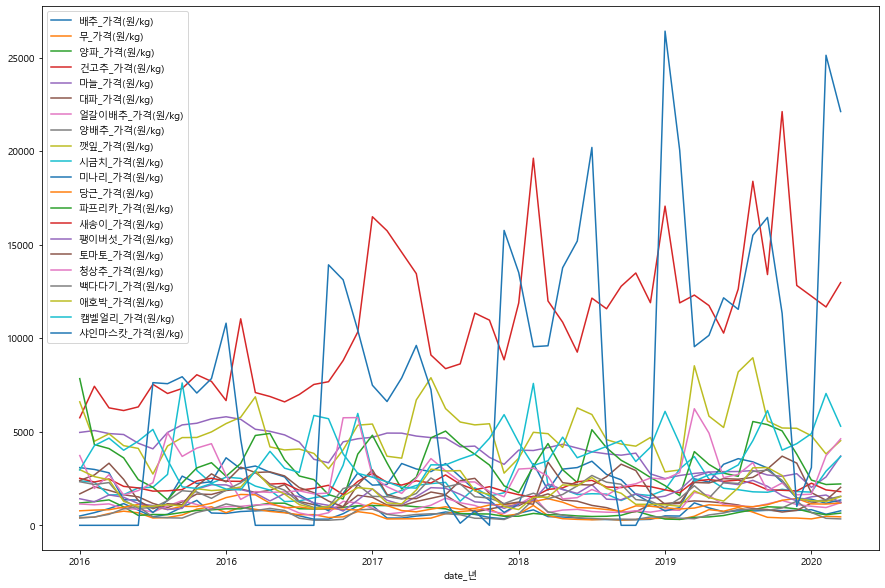

In [83]:
# 이상치 제거한 년별 꺽은선 데이터
pri_mon_year_nout.plot(x="date_년", y=['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)'] ,figsize=(15,10))
# plt.annotate("배추 최대가격",xy=(10,10),xytext=(20,100))
plt.show()

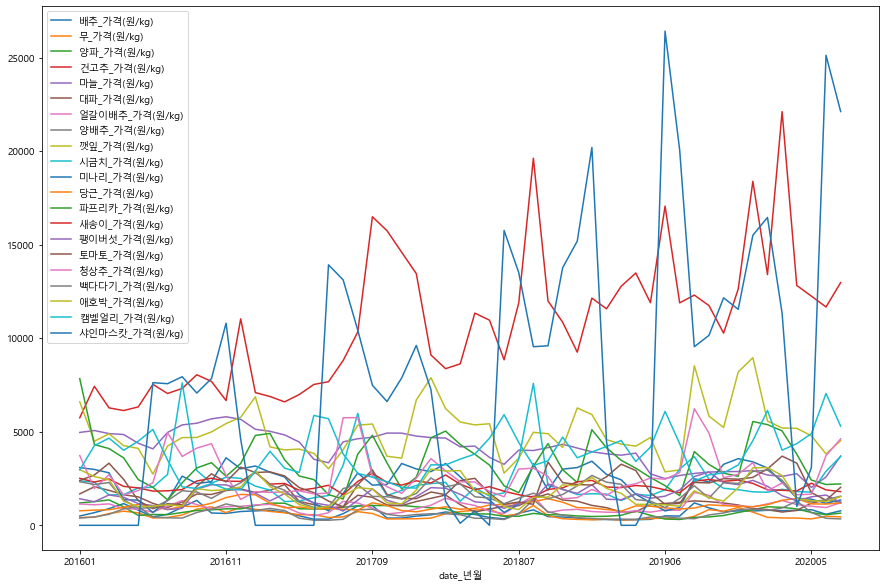

In [84]:
# 이상치 제거 년월 꺽은선 그래프
pri_mon_year_nout.plot(x="date_년월", y=['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)'] ,figsize=(15,10))
# plt.annotate("배추 최대가격",xy=(10,10),xytext=(20,100))
plt.show()

In [ ]:
# 가장 변동성이 높은 품목을 추림

In [88]:
def cal_vix(low, high):
    vix=(high-(low+1))/(low+1)*100 # 0값이 있어 숫자를 1 더해줌
    return vix

In [89]:
cal_vix(pri_mon_year_nout['배추_가격(원/kg)'].min(),pri_mon_year_nout['배추_가격(원/kg)'].max())

366.7317357745468

In [95]:
inc_list={}
for i in range(3,23):
    inc_list[pri_mon_year_nout.columns[i]]=cal_vix(int(pri_mon_year_nout.iloc[:,i].min()),int(pri_mon_year_nout.iloc[:,i].max()))
    

In [96]:
inc_list
# 양배추, 시금치, 미나리, 파프리카, 새송이, 당근

{'배추_가격(원/kg)': 367.719298245614,
 '무_가격(원/kg)': 273.59154929577466,
 '양파_가격(원/kg)': 329.746835443038,
 '건고추_가격(원/kg)': 284.50704225352115,
 '마늘_가격(원/kg)': 186.09467455621302,
 '대파_가격(원/kg)': 207.475317348378,
 '얼갈이배추_가격(원/kg)': 249.70178926441352,
 '양배추_가격(원/kg)': 402.5735294117647,
 '깻잎_가격(원/kg)': 226.77854797519154,
 '시금치_가격(원/kg)': 499.2913385826772,
 '미나리_가격(원/kg)': 428.4040995607613,
 '당근_가격(원/kg)': 128.71012482662968,
 '파프리카_가격(원/kg)': 475.55066079295153,
 '새송이_가격(원/kg)': 87.35936465916612,
 '팽이버섯_가격(원/kg)': 272.3821989528796,
 '토마토_가격(원/kg)': 314.9270482603816,
 '청상추_가격(원/kg)': 349.3150684931507,
 '백다다기_가격(원/kg)': 221.72489082969432,
 '애호박_가격(원/kg)': 266.3107947805457,
 '캠벨얼리_가격(원/kg)': 272.21341785525624}

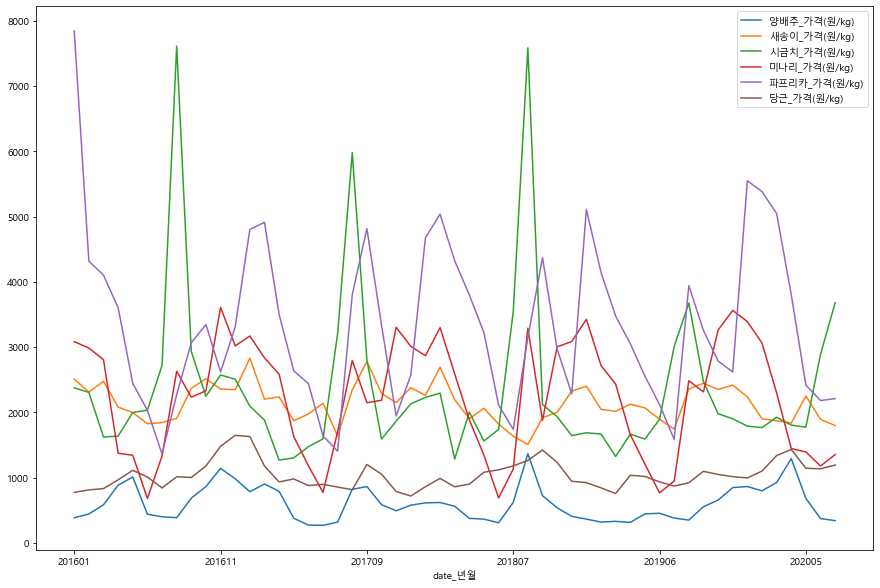

In [97]:
pri_mon_year_nout.plot(x="date_년월", y=[ '양배추_가격(원/kg)', '새송이_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)',
       '파프리카_가격(원/kg)', '당근_가격(원/kg)'] ,figsize=(15,10))
# plt.annotate("배추 최대가격",xy=(10,10),xytext=(20,100))
plt.show()

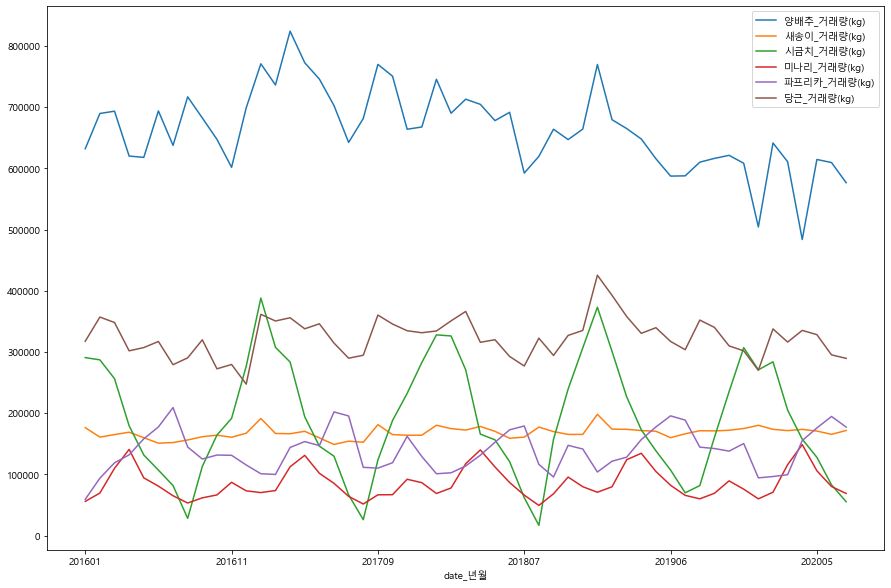

In [98]:
tra_mon_year_nout.plot(x="date_년월", y=[ '양배추_거래량(kg)', '새송이_거래량(kg)', '시금치_거래량(kg)', '미나리_거래량(kg)',
       '파프리카_거래량(kg)', '당근_거래량(kg)'] ,figsize=(15,10))
# plt.annotate("배추 최대가격",xy=(10,10),xytext=(20,100))
plt.show()

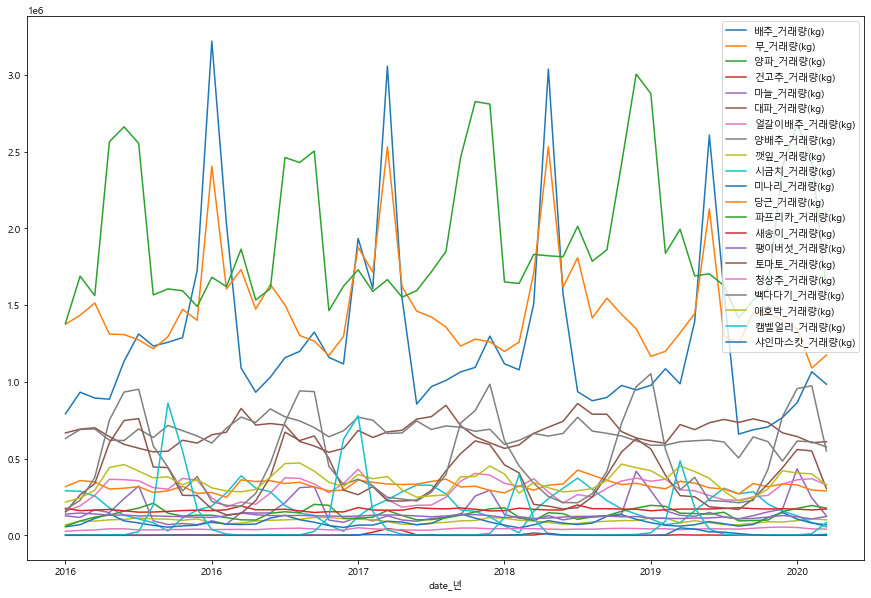

In [99]:
tra_mon_year_nout.plot(x="date_년", y=['배추_거래량(kg)', '무_거래량(kg)', '양파_거래량(kg)', '건고추_거래량(kg)', '마늘_거래량(kg)',
       '대파_거래량(kg)', '얼갈이배추_거래량(kg)', '양배추_거래량(kg)', '깻잎_거래량(kg)',
       '시금치_거래량(kg)', '미나리_거래량(kg)', '당근_거래량(kg)', '파프리카_거래량(kg)',
       '새송이_거래량(kg)', '팽이버섯_거래량(kg)', '토마토_거래량(kg)', '청상추_거래량(kg)',
       '백다다기_거래량(kg)', '애호박_거래량(kg)', '캠벨얼리_거래량(kg)', '샤인마스캇_거래량(kg)'] ,figsize=(15,10))

plt.show()

In [100]:
train_cor_nout=train_nout_comp.corr() 
train_cor_nout

배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  \
배추_거래량(kg)        1.000000    -0.101654   0.715654    0.105890   -0.017628   
배추_가격(원/kg)      -0.101654     1.000000  -0.116728    0.508331   -0.196919   
무_거래량(kg)         0.715654    -0.116728   1.000000   -0.076062    0.019465   
무_가격(원/kg)        0.105890     0.508331  -0.076062    1.000000   -0.086959   
양파_거래량(kg)       -0.017628    -0.196919   0.019465   -0.086959    1.000000   
양파_가격(원/kg)      -0.021480     0.307184   0.152752    0.161434   -0.312871   
건고추_거래량(kg)       0.091300    -0.068378   0.081879   -0.071084   -0.035085   
건고추_가격(원/kg)     -0.055144    -0.013302  -0.019527   -0.119314   -0.046005   
마늘_거래량(kg)       -0.072551    -0.166257  -0.063489   -0.159000    0.507183   
마늘_가격(원/kg)       0.261570     0.159632   0.230752    0.309025   -0.351349   
대파_거래량(kg)        0.061037    -0.100876   0.405698    0.007917    0.046050   
대파_가격(원/kg)       0.161092     0.391576   0.178018    0.402046   -0.226769   
얼갈이배추_거래량(kg)    -0.026789    -0.026280  -0.066827   -0.008022    0.556131   
얼갈이배추_가격(원/kg)   -0.127634     0.601683  -0.086925    0.297224   -0.312456   
양배추_거래량(kg)       0.146106    -0.130051   0.376433    0.065744    0.204367   
양배추_가격(원/kg)      0.148087     0.551810   0.171879    0.423841   -0.151801   
깻잎_거래량(kg)        0.004109    -0.030867  -0.089063   -0.061878    0.272733   
깻잎_가격(원/kg)      -0.105579     0.228655   0.020692    0.259292   -0.208256   
시금치_거래량(kg)       0.059510    -0.139227   0.367649    0.056582   -0.167575   
시금치_가격(원/kg)      0.025017     0.387420  -0.130733    0.130314   -0.208456   
미나리_거래량(kg)      -0.009718    -0.069557   0.088686   -0.021105    0.373760   
미나리_가격(원/kg)      0.325374     0.145332   0.442591    0.183044   -0.440205   
당근_거래량(kg)        0.127734    -0.106892   0.398996   -0.093606    0.278377   
당근_가격(원/kg)       0.214206     0.206142   0.213347    0.307861    0.068180   
파프리카_거래량(kg)      0.127356    -0.171838  -0.042385   -0.163722    0.352810   
파프리카_가격(원/kg)    -0.247484     0.174740   0.072741    0.103205   -0.201508   
새송이_거래량(kg)      -0.032181    -0.002249   0.207412    0.032968    0.094639   
새송이_가격(원/kg)      0.112378     0.210226   0.267876    0.294710   -0.164605   
팽이버섯_거래량(kg)     -0.056922    -0.004537   0.101801    0.112573    0.151078   
팽이버섯_가격(원/kg)     0.124149     0.194745   0.265486    0.235126   -0.151599   
토마토_거래량(kg)      -0.231119    -0.136383  -0.309230   -0.112264    0.589662   
토마토_가격(원/kg)     -0.049763     0.242464   0.183627    0.217403   -0.182916   
청상추_거래량(kg)      -0.084410     0.016765  -0.026218    0.004584    0.260763   
청상추_가격(원/kg)     -0.091495     0.244663  -0.192827    0.079025   -0.208604   
백다다기_거래량(kg)     -0.196827    -0.135527  -0.310010   -0.102540    0.630414   
백다다기_가격(원/kg)    -0.063876     0.152826   0.169461    0.068351   -0.391464   
애호박_거래량(kg)       0.114119    -0.057069   0.047881   -0.026712    0.466747   
애호박_가격(원/kg)     -0.152761     0.159462   0.124955    0.087079   -0.326953   
캠벨얼리_거래량(kg)      0.087094     0.454589  -0.014017    0.139159   -0.171592   
캠벨얼리_가격(원/kg)    -0.268884    -0.157213  -0.241872   -0.226180    0.287303   
샤인마스캇_거래량(kg)     0.186168     0.179231   0.115248    0.205538   -0.145627   
샤인마스캇_가격(원/kg)    0.153504    -0.086026   0.006126   -0.227794   -0.090773   
date_월            0.602483     0.029638   0.260789    0.163666   -0.140094   

                양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  마늘_거래량(kg)  \
배추_거래량(kg)        -0.021480     0.091300     -0.055144   -0.072551   
배추_가격(원/kg)        0.307184    -0.068378     -0.013302   -0.166257   
무_거래량(kg)          0.152752     0.081879     -0.019527   -0.063489   
무_가격(원/kg)         0.161434    -0.071084     -0.119314   -0.159000   
양파_거래량(kg)        -0.312871    -0.035085     -0.046005    0.507183   
양파_가격(원/kg)        1.000000     0.067935     -0.071481   -0.142987   
건고추_거래량(kg)        0.067935     1.000000      0.007327   -0.028022   
건고추_가격(원/kg)      -0.07

In [ ]:
# 상관분석, 상관관계 높은 데이터 추출

In [101]:
pri_month_list_corr_nout=pri_month_list_nout.corr()

In [102]:
tra_month_list_corr_nout=tra_month_list_nout.corr()

In [103]:
s=pri_month_list_corr_nout.unstack()

In [104]:
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

In [105]:
s=tra_month_list_corr_nout.unstack()

In [106]:
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

Text(0.5, 1.0, '채소 가격 HeatMap')

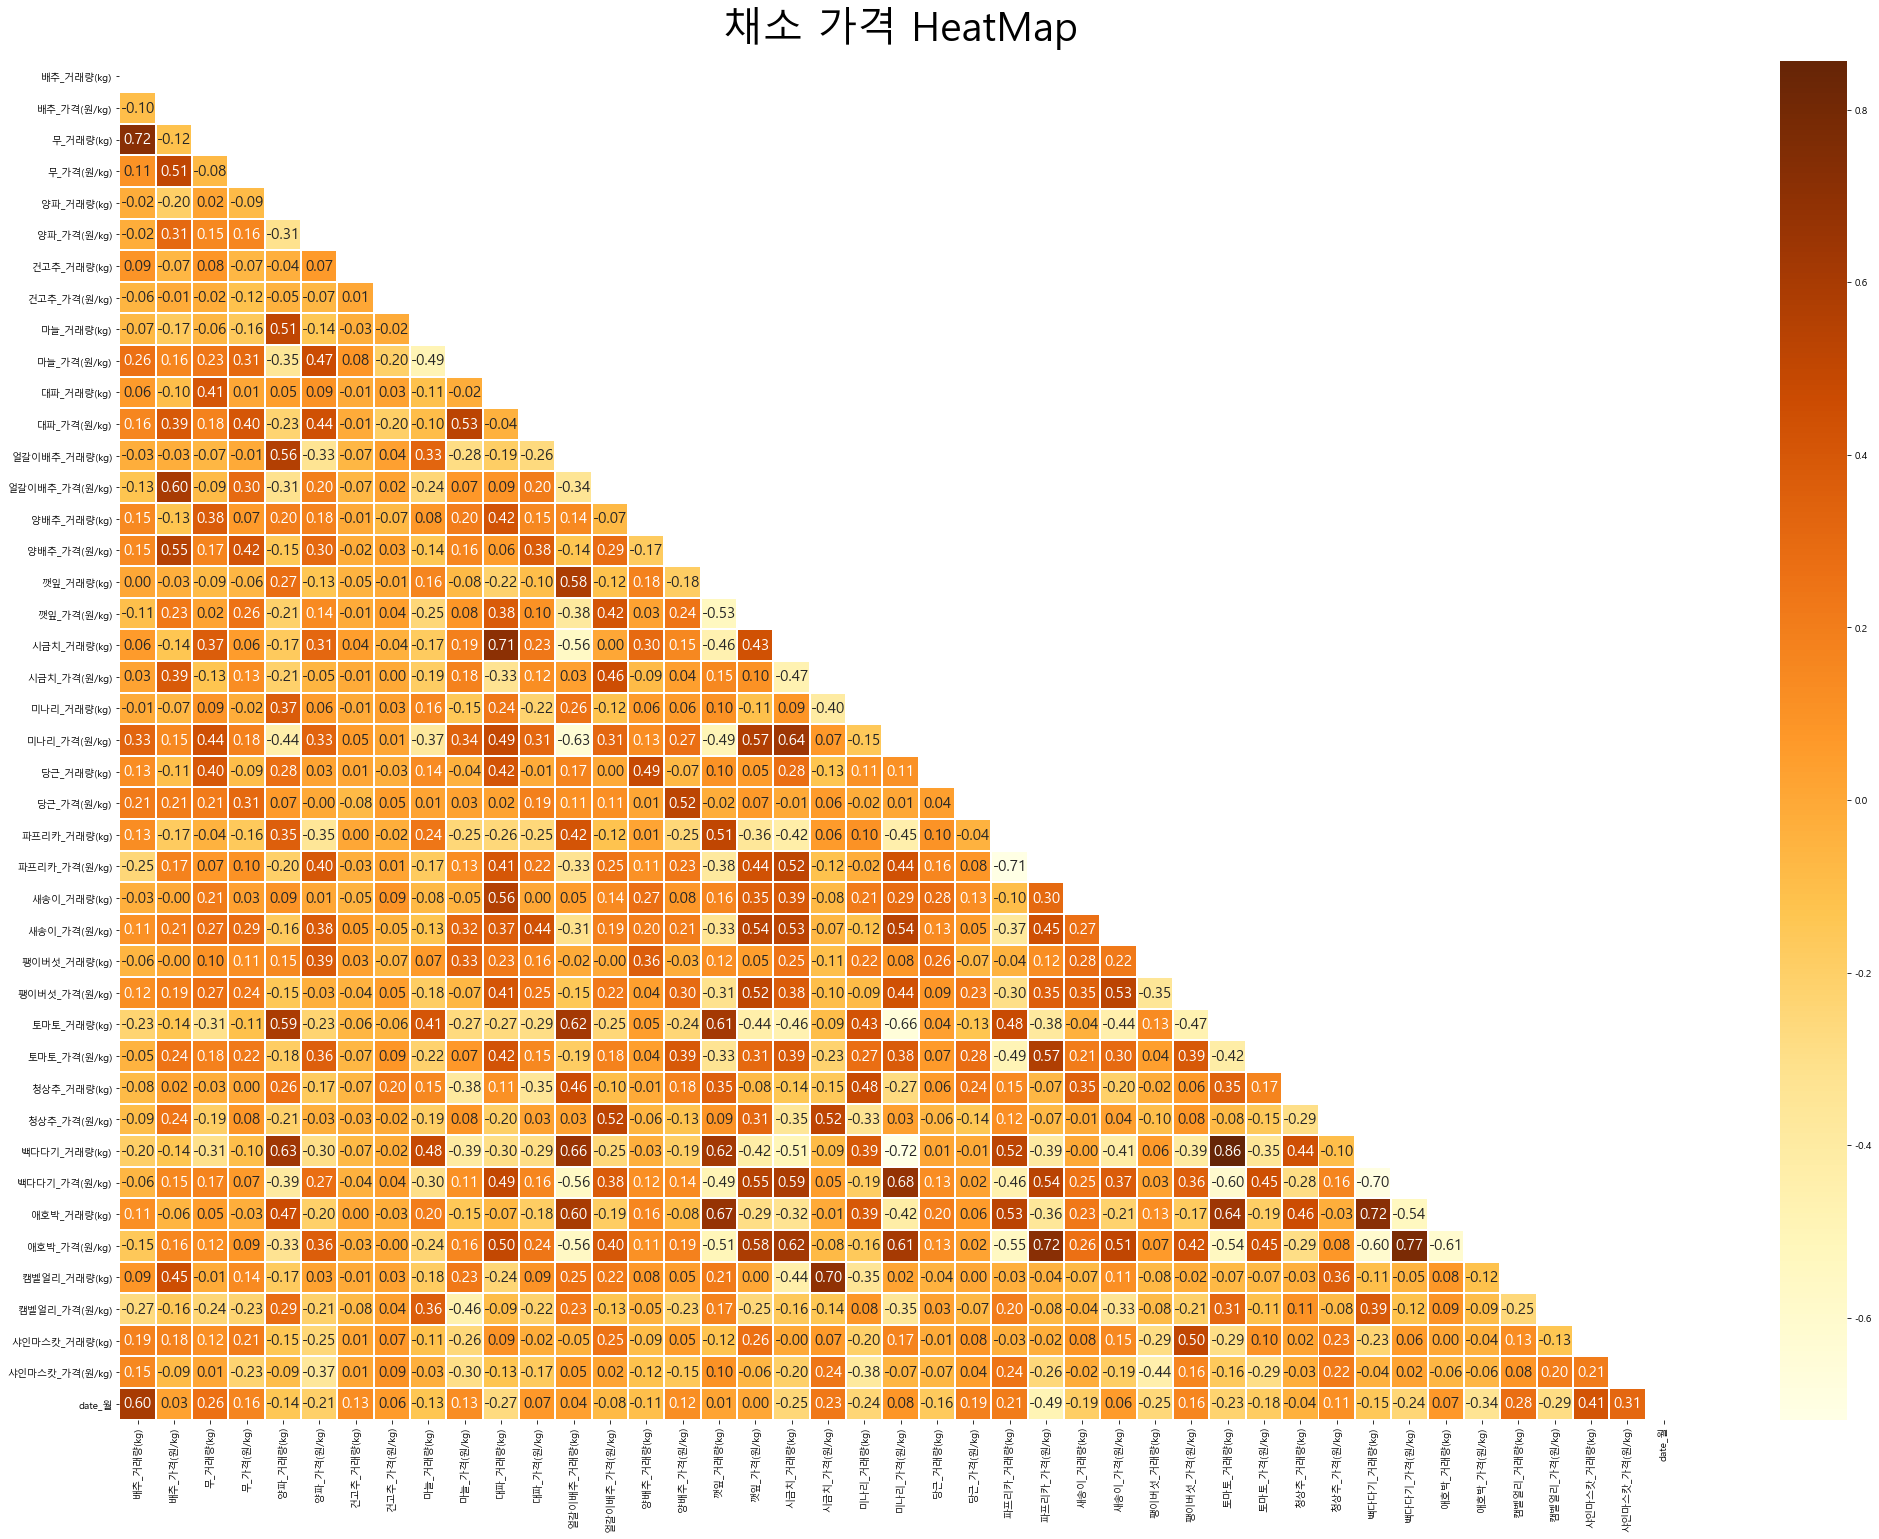

In [107]:
# 에러 나옴 살펴볼것
plt.figure(figsize=(35,25))


mask_s = np.triu(np.ones_like(train_cor_nout, dtype = bool))

sns.heatmap(train_cor_nout, annot=True, fmt=".2f", linewidths=1, mask=mask_s, cmap='YlOrBr', annot_kws={"size": 15}) # 모든 변수간의 관계가 모두 나옴. 그러나 아래 위로 대칭이기 때문에 모두 나올 필요없음.
plt.title('채소 가격 HeatMap', fontsize =40, pad = 20)

Text(0.5, 1.0, '채소 가격 HeatMap')

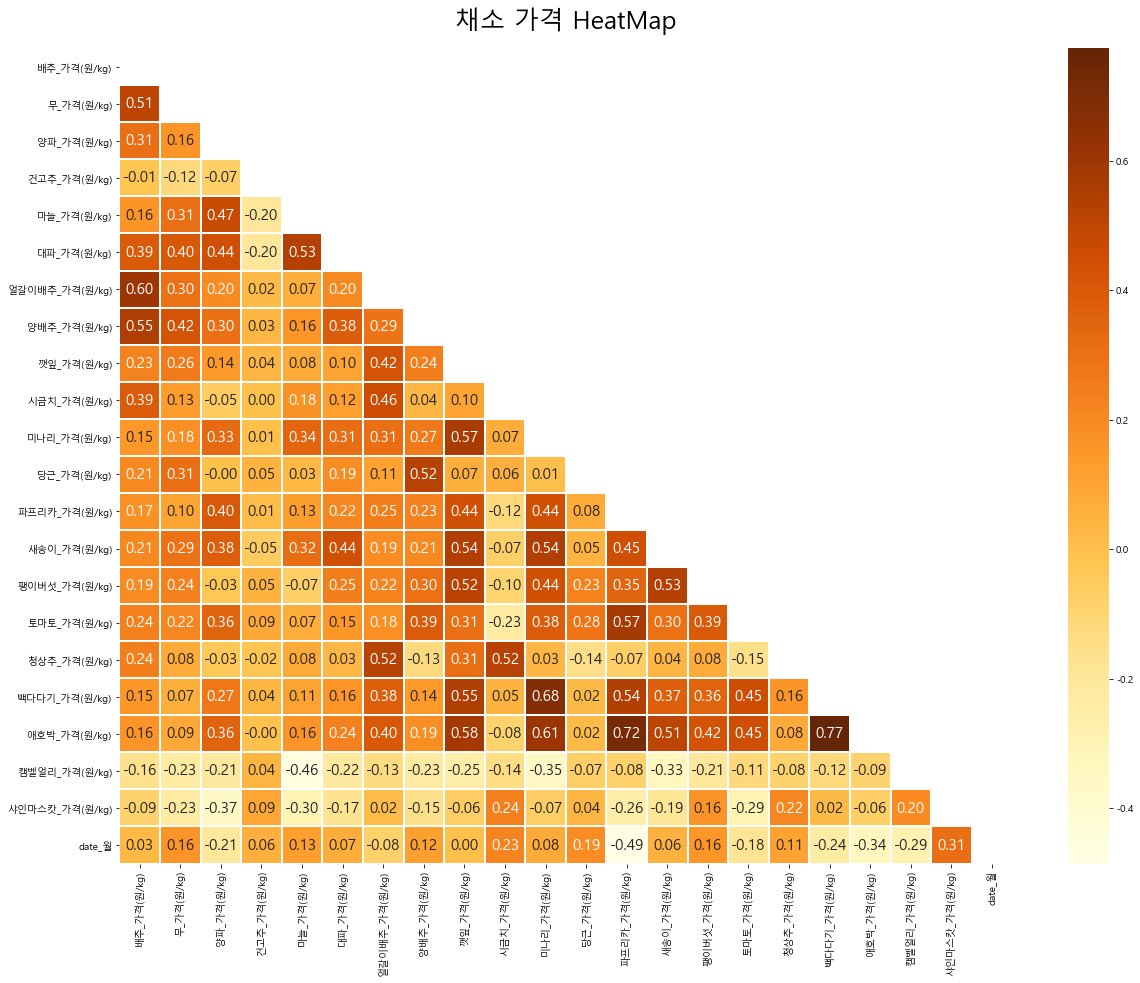

In [108]:
plt.figure(figsize=(20,15))


mask_s = np.triu(np.ones_like(pri_month_list_corr_nout, dtype = bool))

sns.heatmap(pri_month_list_corr_nout, annot=True, fmt=".2f", linewidths=1, mask=mask_s, cmap='YlOrBr', annot_kws={"size": 15}) # 모든 변수간의 관계가 모두 나옴. 그러나 아래 위로 대칭이기 때문에 모두 나올 필요없음.
plt.title('채소 가격 HeatMap', fontsize =25, pad = 20)

Text(0.5, 1.0, '채소 거래량 HeatMap')

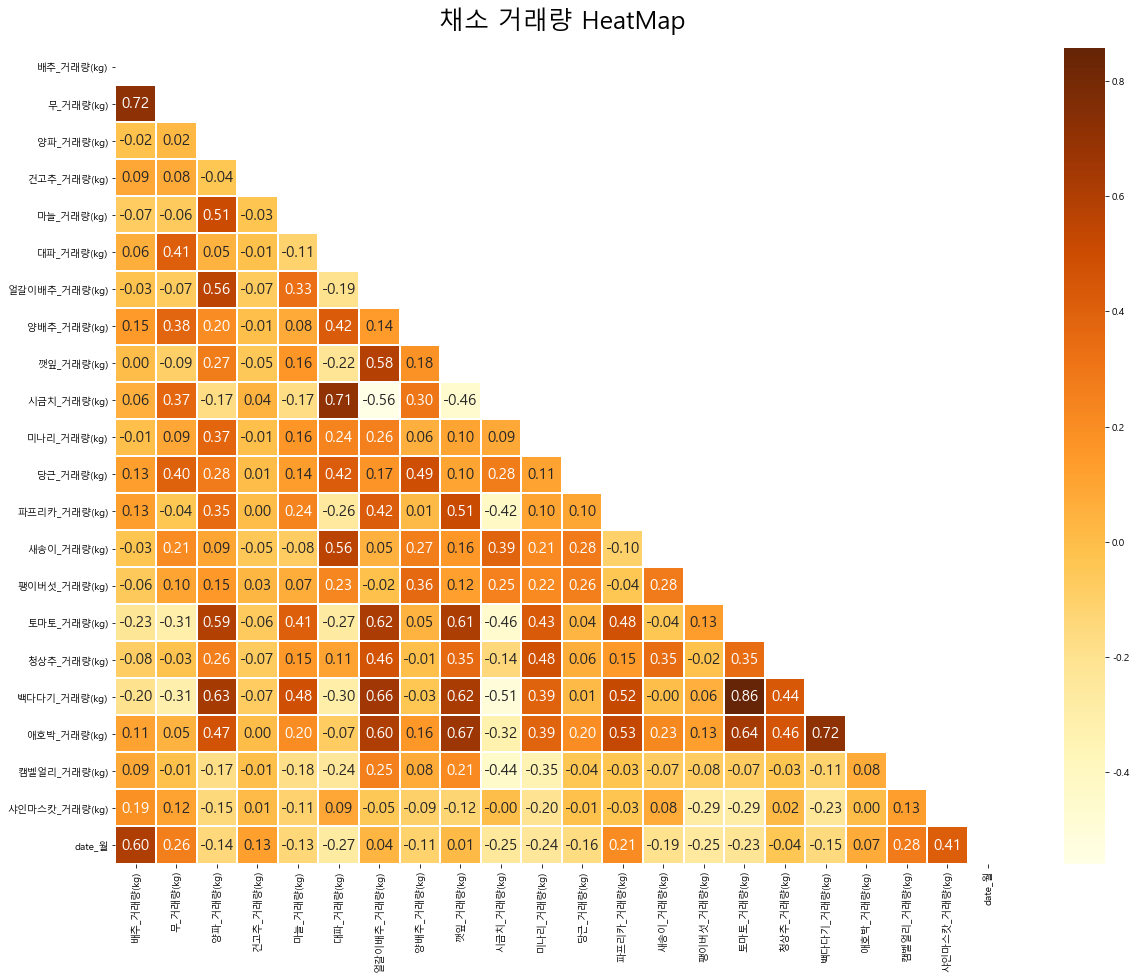

In [109]:
plt.figure(figsize=(20,15))


mask_s = np.triu(np.ones_like(tra_month_list_corr_nout, dtype = bool))

sns.heatmap(tra_month_list_corr_nout, annot=True, fmt=".2f", linewidths=1, mask=mask_s, cmap='YlOrBr', annot_kws={"size": 15}) # 모든 변수간의 관계가 모두 나옴. 그러나 아래 위로 대칭이기 때문에 모두 나올 필요없음.
plt.title('채소 거래량 HeatMap', fontsize =25, pad = 20)

In [110]:
# 박스플랏


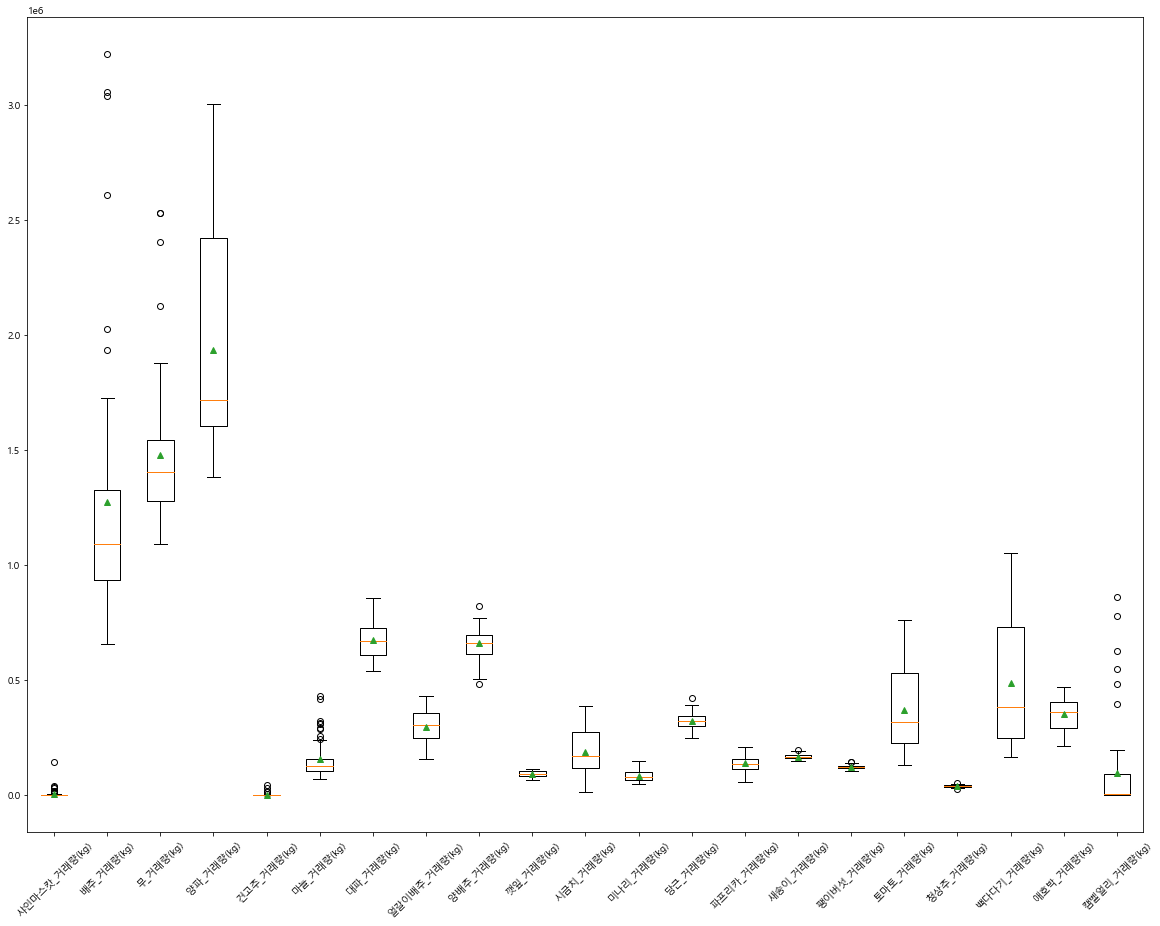

In [121]:
plt.figure(figsize=(20,15))
plt.boxplot([tra_mon_year.iloc[:,23],tra_mon_year_nout.iloc[:,3],tra_mon_year_nout.iloc[:,4],tra_mon_year_nout.iloc[:,5],tra_mon_year_nout.iloc[:,6],
            tra_mon_year_nout.iloc[:,7],tra_mon_year_nout.iloc[:,8],tra_mon_year_nout.iloc[:,9],tra_mon_year_nout.iloc[:,10],tra_mon_year_nout.iloc[:,11],
            tra_mon_year_nout.iloc[:,12],tra_mon_year_nout.iloc[:,13],tra_mon_year_nout.iloc[:,14],tra_mon_year_nout.iloc[:,15],tra_mon_year_nout.iloc[:,16],
            tra_mon_year_nout.iloc[:,17],tra_mon_year_nout.iloc[:,18],tra_mon_year_nout.iloc[:,19],tra_mon_year_nout.iloc[:,20],tra_mon_year_nout.iloc[:,21],
            tra_mon_year_nout.iloc[:,22]],labels=[ '샤인마스캇_거래량(kg)','배추_거래량(kg)', '무_거래량(kg)', '양파_거래량(kg)',
       '건고추_거래량(kg)', '마늘_거래량(kg)', '대파_거래량(kg)', '얼갈이배추_거래량(kg)',
       '양배추_거래량(kg)', '깻잎_거래량(kg)', '시금치_거래량(kg)', '미나리_거래량(kg)', '당근_거래량(kg)',
       '파프리카_거래량(kg)', '새송이_거래량(kg)', '팽이버섯_거래량(kg)', '토마토_거래량(kg)',
       '청상추_거래량(kg)', '백다다기_거래량(kg)', '애호박_거래량(kg)', '캠벨얼리_거래량(kg)'], showmeans=True)
plt.xticks(rotation=45)
plt.show()

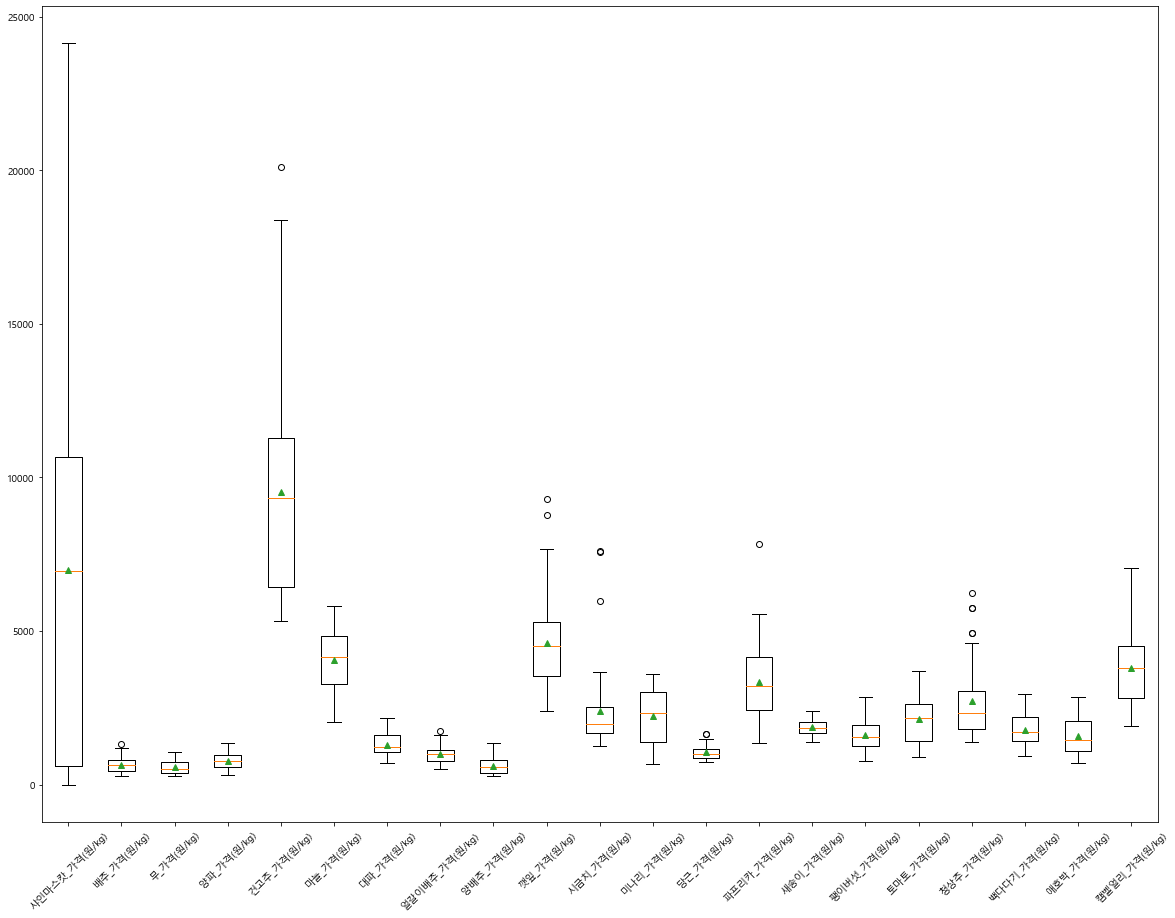

In [122]:
plt.figure(figsize=(20,15))
plt.boxplot([pri_mon_year.iloc[:,23],pri_mon_year_nout.iloc[:,3],pri_mon_year_nout.iloc[:,4],pri_mon_year_nout.iloc[:,5],pri_mon_year.iloc[:,6],
            pri_mon_year_nout.iloc[:,7],pri_mon_year_nout.iloc[:,8],pri_mon_year_nout.iloc[:,9],pri_mon_year_nout.iloc[:,10],pri_mon_year.iloc[:,11],
            pri_mon_year_nout.iloc[:,12],pri_mon_year_nout.iloc[:,13],pri_mon_year_nout.iloc[:,14],pri_mon_year_nout.iloc[:,15],pri_mon_year.iloc[:,16],
            pri_mon_year_nout.iloc[:,17],pri_mon_year_nout.iloc[:,18],pri_mon_year_nout.iloc[:,19],pri_mon_year_nout.iloc[:,20],pri_mon_year.iloc[:,21],
            pri_mon_year_nout.iloc[:,22]],labels=[ '샤인마스캇_가격(원/kg)','배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)',
       '건고추_가격(원/kg)', '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)',
       '양배추_가격(원/kg)', '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)',
       '당근_가격(원/kg)', '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)',
       '토마토_가격(원/kg)', '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)',
       '캠벨얼리_가격(원/kg)'], showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [123]:
tra_mon_year_nout.head(2)

date_년  date_월 date_년월     배추_거래량(kg)   무_거래량(kg)    양파_거래량(kg)  \
0   2016       1  201601  792327.015000  1376010.43  1.382490e+06   
1   2016       2  201602  932983.233333  1434456.16  1.689355e+06   

   건고추_거래량(kg)     마늘_거래량(kg)  대파_거래량(kg)  얼갈이배추_거래량(kg)  ...     당근_거래량(kg)  \
0  1198.920000  126870.060000  667476.265  156221.025000  ...  317453.730000   
1  1405.626667  116430.426667  692544.920  192579.086667  ...  356951.733333   

   파프리카_거래량(kg)    새송이_거래량(kg)   팽이버섯_거래량(kg)  토마토_거래량(kg)   청상추_거래량(kg)  \
0     59176.605  176285.095000  138428.040000    152403.55  26827.065000   
1     93656.380  160767.526667  145466.086667    263805.96  31912.293333   

   백다다기_거래량(kg)    애호박_거래량(kg)  캠벨얼리_거래량(kg)  샤인마스캇_거래량(kg)  
0     167379.31  216396.490000   2342.050000            0.0  
1     228270.84  244047.586667   1840.053333            0.0  

[2 rows x 24 columns]

In [124]:
# plotly 애니메이션으로 년도별 가격 변동 모습 

In [125]:
import plotly.express as px
import plotly.graph_objs as go

In [126]:
pri_mon_year_nout.T.head(2)

0     1     2     3     4     5     6     7     8     9   ...    43  \
date_년  2016  2016  2016  2016  2016  2016  2016  2016  2016  2016  ...  2019   
date_월     1     2     3     4     5     6     7     8     9    10  ...    10   

          44    45    46    47    48    49    50    51    52  
date_년  2019  2019  2020  2020  2020  2020  2020  2020  2020  
date_월    11    12     1     2     3     4     5     6     7  

[2 rows x 53 columns]

In [139]:
fig = px.bar(pri_mon_year_nout, x="date_년", y="배추_가격(원/kg)")
fig.show()

In [130]:
fig = px.line(pri_mon_year_nout, x="date_년월", y=["배추_가격(원/kg)"])
fig.show()

In [131]:
fig = px.line(pri_mon_year_nout, x="date_년월", y=[ '양배추_가격(원/kg)', '새송이_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)',
       '파프리카_가격(원/kg)', '당근_가격(원/kg)'] )
fig.show()

In [133]:
fig = px.line(tra_mon_year_nout, x="date_년월", y=[ '양배추_거래량(kg)', '새송이_거래량(kg)', '시금치_거래량(kg)', '미나리_거래량(kg)',
       '파프리카_거래량(kg)', '당근_거래량(kg)']  )
fig.show()

In [134]:
fig=px.bar(pri_mon_year_nout, x="date_월", y=['배추_가격(원/kg)'], animation_frame="date_년", animation_group="date_월")
fig.update_layout(transition = {'duration': 10000})
fig.show()

In [135]:
import plotly.graph_objects as go
fig = go.Figure(
   data=[go.Bar(y=pri_mon_year_nout["배추_가격(원/kg)"], x=pri_mon_year_nout["date_년월"])],
   layout_title_text="채소 가격")
# fig.update_layout( legend=dict(
#         x=0,
#         y=1.0,
#         bgcolor='rgba(155, 155, 155, 0)',
#         bordercolor='rgba(155, 155, 155, 0)'
#     ))

fig.show()

# 여기에 날씨랑 해서 같이 넣어도 괜찮을듯 싶음.